<p align ="center"><strong> ESTRUCTURAL ANALYSIS OMNIDIRECTIONAL</p>

<p><b>By: Jefferson C.</b><p>

---

### __Structural Analysis__


In [3]:
# Dependencies for Algorithms
import numpy as np
import pandas as pd
# Dependencies for Plots
import matplotlib.pyplot as plt
# Dependencies for models
from scipy.optimize import curve_fit

#### __Empirical Semivariogram__
__Def.__

Función que __mide cómo varía la similitud de un fenómeno espacial en función de la distancia entre puntos__; indica qué tan parecidos o distintos son los valores a medida que se alejan

__Formula:__
$$
\hat{\gamma}(h) = \frac{1}{2N(h)} \sum_{i=1}^{N(h)} [Z(x_i + h) - Z(x_i) ]^2 \qquad \equiv \qquad \hat{\gamma}(h) = \frac{1}{2N(h)} \sum_{i=1}^{N(h)} [Yi - Xi]^2
$$

donde : 
- $\hat{\gamma}(h)$: semivariograma empirico para la distancia $h$.
- $N(h)$: número de pares de puntos separados por la distancia $h$.
- $Z(x_i)$: valor de la variable en la ubicación $x_i$.
- $Z(x_i + h)$: valor de la variable en la ubicación separada por $h$.

__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)


__Code :__

In [4]:
def semivariogram_EW(Zxi, h):
    # EAST-WEST Semivariogram
    # Compute y(h) using HORIZONTAL (180°) pairs sepated by lag (h)

    # Access to position Zxi
    n, m = Zxi.shape
    Xi, Yi = [], []

    # If lag exceeds matrix return no pairs
    if h >= m:
        return np.nan

    # Loop through all rows and columns (when c + h is valid)
    # iterate over rows
    for r in range(n):
        # iterate over columns
        for c in range(m - h):

            # Zxi value (1 value)
            a = Zxi[r, c]
            # Zxi + h (2 value)
            b = Zxi[r, c + h]

            # Only include valid pairs
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # No valid pairs (pad NA value)
    if len(Xi) == 0:
        return np.nan

    # Compute East-West Semivariogram
    return np.round(np.mean((np.array(Yi) - np.array(Xi))**2) / 2,4)


def semivariogram_SN(Zxi, h):
    # SOUTH-NORTH Semivariogram
    # Compute y(h) using VERTICAL (90°) pairs sepated by lag (h)

    # Access to position Zxi
    n, m = Zxi.shape
    Xi, Yi = [], []

    # If lag excedeeds matrix return no pairs
    if h >= n:
        return np.nan

    # Loop through all rows and columns (when c + h is valid)
    # iterate over columns
    for c in range(m):
        # iterate over rows
        for r in range(n - h):
            # Zxi value (1 value)
            a = Zxi[r, c]
            # Zxi + h value (2 value)
            b = Zxi[r + h, c]

            # Incluide valid pairs
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # No valid pairs (pad NA value)
    if len(Xi) == 0:
        return np.nan
    # Compute South-North variogram
    return np.round(np.mean((np.array(Yi) - np.array(Xi))**2) / 2,4)


def semivariogram_NE(Zxi, h):
    # NORTH-EAST Semivariogram
    # Compute y(h) using DIAGONALS (45°) pairs sepated by lag (h)

    # Access to Zxi index
    n, m = Zxi.shape
    Xi, Yi = [], []

    # Diagonals starting from first column
    for start_row in range(n):
        # initial values
        r, c = start_row, 0
        diag = []

        # Trace the NE diagonal until boundary reached
        while r >= 0 and c < m:
            diag.append(Zxi[r, c])
            r -= 1
            c += 1

        # Add valid pairs (separated by h)
        for i in range(len(diag) - h):
            a = diag[i]
            b = diag[i + h]

            # incluide valid pairs
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # Diagonals Starting from bottom row (excluiding first column)
    for start_col in range(1, m):
        # Initial Values
        r, c = n - 1, start_col
        diag = []

        # Traverse Diagonal starting at (r,c)
        while r >= 0 and c < m:
            diag.append(Zxi[r, c])
            r -= 1
            c += 1

        # Add valid pairs (separated by h)
        for i in range(len(diag) - h):
            a = diag[i]
            b = diag[i + h]
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # No valid pairs (pad NA values)
    if len(Xi) == 0:
        return np.nan

    # Compute NE Semivariogram
    return np.round(np.mean((np.array(Yi) - np.array(Xi))**2) / 2,4)


def semivariogram_SE(Zxi, h):
    # SOUTH-EAST Semivariogram
    # Compute y(h) using DIAGONALS (315°) pairs sepated by lag (h)

    # Zxi index
    n, m = Zxi.shape
    Xi, Yi = [], []

    # Diagonals starting from the first column
    for start_row in range(n - 2, -1, -1):
        # Start from row n-2 down to row 0
        r, c = start_row, 0
        diag = []

        # Traverse a SE diagonal until we hit the boundary
        while r < n and c < m:
            diag.append(Zxi[r, c])
            # move down
            r += 1
            # move right
            c += 1

        # Iterate over value for determinate valid pairs
        for i in range(len(diag) - h):
            a = diag[i]
            b = diag[i + h]

            # Add valid pairs
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # Diagonals Starting from the top row
    for start_col in range(1, m):
        # Start at row 0
        r, c = 0, start_col
        diag = []

        # Traverse a SE diagonal
        while r < n and c < m:
            diag.append(Zxi[r, c])
            r += 1
            c += 1

        # Iterate over value for determinate valid pairs
        for i in range(len(diag) - h):
            a = diag[i]
            b = diag[i + h]
            if not (np.isnan(a) or np.isnan(b)):
                Xi.append(a)
                Yi.append(b)

    # No valid pairs (pad NA values)
    if len(Xi) == 0:
        return np.nan

    # Compute SE Semivariogram
    return np.round(np.mean((np.array(Yi) - np.array(Xi))**2) / 2,4)

# FINAL FUNCTIONS

def semivariogram_table(Zxi, lag, num_lags):

    """
    Computes the experimental one-dimentional semivariogram

    Parameters
    --------------
    Zxi : Matrix (2D array)
            Series of spatial values.
    lag : int
            Base distance (lag) between observations, in the same spatial units
    num_lags : Int
            Total numbers of distances (number lags)
    """

    Zxi = np.asarray(Zxi, dtype=float)

    directions = ['EW', 'SN', 'NE', 'SE']
    table = {d: [] for d in directions}

    # Lags values
    lag_values = [(i+1) * lag for i in range(num_lags)]

    # Compute semivariogram using h (number lags)
    for h in range(1, num_lags + 1):

        # EW (EAST-WEST)
        table['EW'].append( semivariogram_EW(Zxi, h) )

        # SN (SOUTH-NORTH)
        table['SN'].append( semivariogram_SN(Zxi, h) )

        # NE (NORTH-EAST)
        table['NE'].append( semivariogram_NE(Zxi, h) )

        # SE (SOUTH-EAST)
        table['SE'].append( semivariogram_SE(Zxi, h) )

    # Create a Table (Data Frame)
    df = pd.DataFrame(table, index=lag_values)
    df.index.name = "Lag"
    return df

def plot_variogram(df):

    """
    Plots a Omnidirectional variogram curve for each column in the DataFrame.

    df: DataFrame produced by semivariogram_table()
        Columns = ['EW', 'SN', 'NE', 'SE']
        Index   = lag distances
    """
    # Figure
    plt.style.use("seaborn-v0_8-whitegrid")
    plt.figure(figsize=(8,5))

    # Graph for each figure
    for col in df.columns:
        plt.plot(df.index, df[col], marker='o', linewidth=2, label=col)

    # setting Graph
    plt.xlabel("Lag")
    plt.ylabel("Semivariogra y(h)")
    plt.yscale('log')
    plt.title("Omnidirectional Experimental Semivariogram",fontweight = 'bold')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

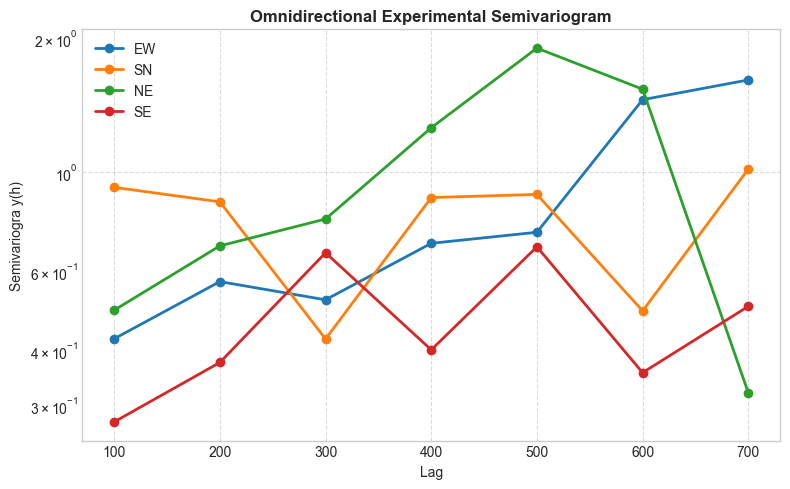

,EW,SN,NE,SE
Lag,,,,
100,0.4229,0.9246,0.4902,0.2753
200,0.5682,0.8578,0.6833,0.3742
300,0.5172,0.4224,0.7850,0.6594
400,0.6924,0.8770,1.2577,0.3994
500,0.7331,0.8914,1.8975,0.6800
600,1.4538,0.4885,1.5350,0.3550
700,1.6100,1.0158,0.3200,0.5000


In [5]:
# Inputs
Zxi = np.array( [
    [6.1, 6.4, 6.6, np.nan, 7.0, 7.3, 7.5,5],
    [6.0, np.nan, 6.5, 6.8, 7.0, np.nan, 7.2,6],
    [5.8, 6.1, np.nan, 6.5, 6.7, 6.9, 7.1,8],
    [5.6, 5.9, 6.2, np.nan, 6.6, 6.8, np.nan, 5],
    [np.nan, 5.6, 5.9, 6.1, np.nan, 6.5, 6.7,4],
    [5.2, 5.4, np.nan, 5.8, 6.0, 6.3, 6.5,9],
    [5.0, np.nan, 5.3, 5.6, 5.8, np.nan, 6.2,5],
    [5.8, 5.0, 5.2, 6.4, np.nan, 5.7, 6.4, 7.1],
])

lag = 100
num_lags = 7

# Outputs
data = semivariogram_table(Zxi, lag, num_lags)
plot_variogram(data)
data

### __2. Theoretical Models__

#### __Modelo Esférico__

$$
\gamma(h) =
\begin{cases}
C_0 + C_1 \left[ \frac{3}{2} \frac{h}{a} - \frac{1}{2} \left(\frac{h}{a}\right)^3 \right], & 0 \leq h \leq a \\
C_0 + C_1, & h > a
\end{cases}
$$

- $C_0$: Pepita (nugget effect)  
- $C_1$: Meseta (sill - nugget)  
- $a$: Rango (range)  
- $h$: Distancia (lag)

#### __Modelo Exponencial__

$$
\gamma(h) = C_0 + C_1 \left(1 - \exp\left(-\frac{h}{a}\right)\right)
$$

- $C_0$: Pepita  
- $C_1$: Meseta  
- $a$: Rango efectivo (distancia a la que el semivariograma alcanza aproximadamente el 95% de la meseta)  
- $h$: Distancia  

#### __Modelo Gaussiano__
$$
\gamma(h) = C_0 + C_1 \left(1 - \exp\left(-\left(\frac{h}{a}\right)^2\right)\right)
$$

- $C_0$: Pepita  
- $C_1$: Meseta  
- $a$: Rango efectivo  
- $h$: Distancia  

#### __Modelo Lineal (Monómico con $\theta=1$)__

$$
\gamma(h) = k \cdot h, \quad h \geq 0
$$

- $k$: Pendiente de la línea (slope)  
- $h$: Distancia  

#### __Modelo Pepita Puro (Modelo de Independencia)__

$$
\gamma(h) =
\begin{cases}
0, & h=0 \\
C_0, & h > 0
\end{cases}
$$

- $C_0 > 0$: Pepita  
- Indica ausencia de correlación espacial (valores independientes espacialmente)

#### __Notes:__
- La **meseta** es el valor máximo que alcanza el semivariograma: $C_0 + C_1$.
- El **pepita** representa la variabilidad a escala muy pequeña o error de medición.
- El **rango** indica la distancia hasta la cual existe correlación espacial significativa.


__Reference:__

Giraldo Henao, R. (2002). *Introducción a la geoestadística: Teoría y aplicación* (Cap. 3). Universidad Nacional de Colombia. Retrieved from [https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf](https://geoinnova.org/wp-content/uploads/2021/08/LIBRO_-DE-_GEOESTADISTICA-R-Giraldo.pdf)


__Code :__

In [6]:
# Plot Style

# 1. THEORETICAL MODELS
def spherical(h, nugget, sill, a):
    """
    Spherical semivariogram model
    h: lag distances
    nugget: nugget effect
    sill: sill value
    a: range
    """
    h = np.array(h)
    # Use spherical formula for h <= a, otherwise return sill + nugget
    return np.where(h <= a, nugget + sill*(1.5*(h/a) - 0.5*(h/a)**3), nugget + sill)

def exponential(h, nugget, sill, a):
    """Exponential semivariogram model"""
    return nugget + sill*(1 - np.exp(-h/a))

def gaussian(h, nugget, sill, a):
    """Gaussian semivariogram model"""
    return nugget + sill*(1 - np.exp(-(h/a)**2))

def linear(h, k):
    """Linear semivariogram model"""
    return k*h

def pure_nugget(h, C0):
    """Pure nugget model: constant value C0"""
    return np.full_like(h, C0)

def constant_sill(h, C):
    """Constant sill model"""
    return np.full_like(h, C)

# Dictionary of all models
models = {
    "Spherical": spherical,
    "Exponential": exponential,
    "Gaussian": gaussian,
    "Linear": linear,
    # 'Pepita' = pure nugget
    "Pepita": pure_nugget,
    # 'Meseta' = constant sill
    "Meseta": constant_sill
}

# 2. FUNCTION TO FIT MODELS
def fit_models(h, y):
    """
    Fit all theoretical models to experimental semivariogram data.
    h: lag distances
    y: semivariance values
    Returns a dictionary with fitted parameters, RMSE, and predicted values.
    """
    results = {}
    for name, fn in models.items():
        # Initial parameter guesses (p0)
        if name in ["Spherical", "Exponential", "Gaussian"]:
            p0 = [0.01, max(y), max(h)/2]  # nugget, sill, range
        elif name == "Linear":
            p0 = [max(y)/max(h)]
        else:  # Pure nugget or constant sill
            p0 = [max(y)]
        try:
            params, _ = curve_fit(fn, h, y, p0=p0, maxfev=5000)  # fit model
        except RuntimeError:
            continue  # skip if curve_fit fails

        pred = fn(h, *params)  # predicted values
        rmse = np.sqrt(np.mean((y - pred)**2))  # root mean squared error

        # Extract parameters safely
        nugget = params[0] if len(params) > 0 else np.nan
        sill = params[1] if len(params) > 1 else np.nan
        a = params[2] if len(params) > 2 else np.nan

        # Store results
        results[name] = {
            "params": params,
            "nugget": nugget,
            "sill": sill,
            "range": a,
            "rmse": rmse,
            "pred": pred
        }
    return results

# 3. FUNCTION TO PLOT DASHBOARD

def plot_dashboard_best_horizontal(df):
    """
    Plot experimental semivariograms and best-fitting model for each direction
    in a horizontal dashboard layout.
    """
    plt.style.use("seaborn-v0_8-whitegrid")
    directions = df.columns
    n_dirs = len(directions)

    # Create a horizontal dashboard: one plot for all experimental variograms
    # + one subplot per direction for the best model
    fig, axes = plt.subplots(1, n_dirs + 1, figsize=(4*(n_dirs+1), 5), sharey=True)

    all_results = {}

    # First plot: experimental semivariograms
    ax = axes[0]
    for direction in directions:
        ax.plot(df.index, df[direction], marker='o', linestyle='-', label=direction)
    ax.set_title("Experimental Semivariograms",fontweight = 'bold')
    ax.set_xlabel("Lag")
    ax.set_ylabel("Semivariogram")
    ax.set_yscale('log')  # logarithmic scale on Y-axis
    ax.grid(True, which="both", ls="--", lw=0.5)
    ax.legend()

    # Subplots for each direction with best-fitting model
    for i, direction in enumerate(directions):
        y = df[direction].values
        h = df.index.values
        results = fit_models(h, y)
        all_results[direction] = results
        if not results:  # skip if fitting failed
            continue
        best_model = min(results, key=lambda m: results[m]["rmse"])
        best_pred = results[best_model]["pred"]

        ax = axes[i+1]
        ax.scatter(h, y, color='black', label="Experimental")
        ax.plot(h, best_pred, label=f"Best model: {best_model}", linewidth=2)
        ax.set_title(f"{direction} (RMSE: {results[best_model]['rmse']:.4f})",fontweight = 'bold')
        ax.set_xlabel("Lag")
        ax.set_yscale('log')  # logarithmic scale
        ax.grid(True, which="both", ls="--", lw=0.5)
        ax.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

    # Create a DataFrame with all results
    records = []
    for direction, models_res in all_results.items():
        for model_name, res in models_res.items():
            records.append({
                "Direction": direction,
                "Model": model_name,
                "Nugget": res["nugget"],
                "Sill": res["sill"],
                "Range": res["range"],
                "RMSE": res["rmse"]
            })
    df_results = pd.DataFrame(records)
    return df_results

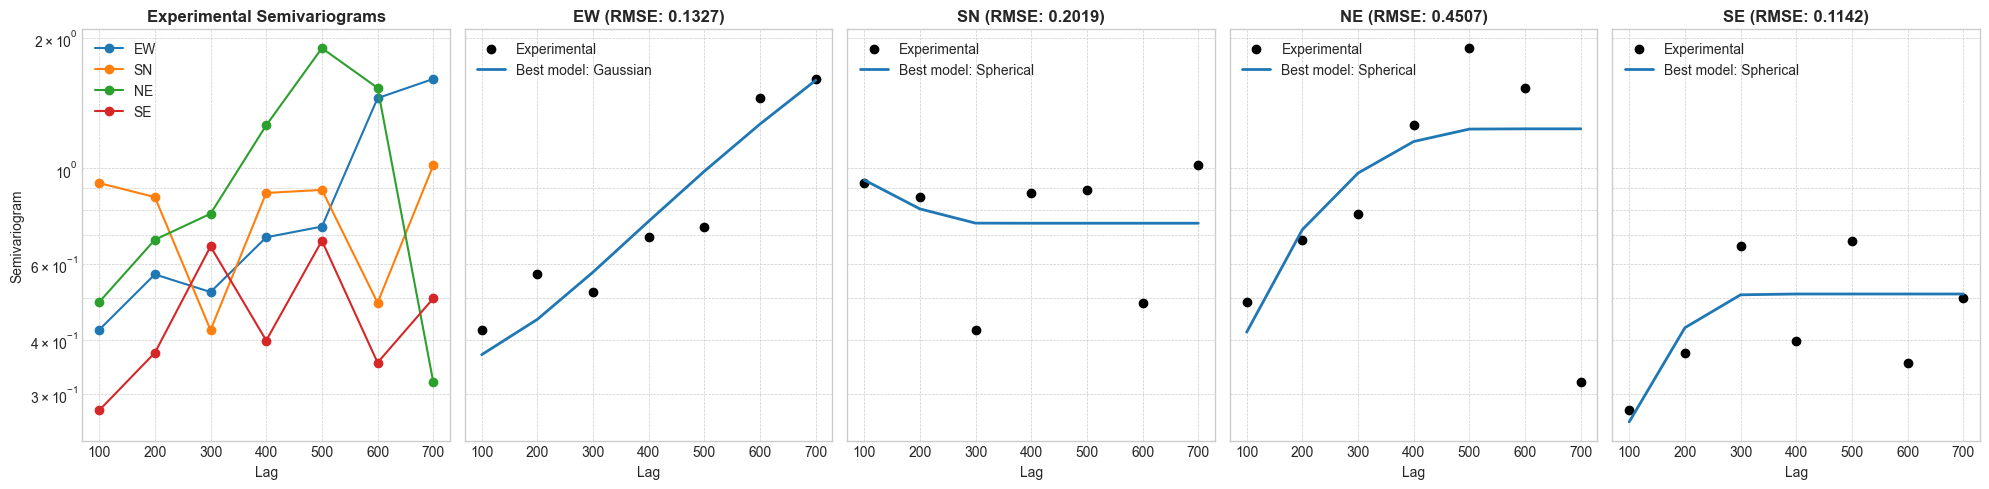

,Direction,Model,Nugget,Sill,Range,RMSE
0,EW,Spherical,0.064171,3576.039422,2.706972e+06,0.190293
1,EW,Exponential,0.064178,9851.457347,4.971284e+06,0.190299
2,EW,Gaussian,0.344729,6416.616291,5.005981e+04,0.132667
3,EW,Linear,0.002110,NaN,NaN,0.192445
4,EW,Pepita,0.856800,NaN,NaN,0.963007
5,EW,Meseta,0.856800,NaN,NaN,0.963007
6,SN,Spherical,1.112248,-0.365925,3.074326e+02,0.201889
7,SN,Exponential,2.086000,-1.332530,4.944347e+01,0.204047
8,SN,Gaussian,0.758148,430.525799,-5.946244e+04,0.211932
9,SN,Linear,0.001565,NaN,NaN,0.409384


In [7]:
# Input
df_results = plot_dashboard_best_horizontal(data)

# Outputs
df_results

---